# InstaBot Project - Part 2¶

##  1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers. 

   ### 1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the      first 10 handles and find the top 5 which have the highest number of followers

In [1]:

from selenium.webdriver.common.keys import Keys                            #provide keys in the keyboard like RETURN, F1, ALT
from selenium.webdriver.support.ui import Select                           #to select the option html attribute
from selenium.webdriver.support.ui import WebDriverWait                    #To use implcit and explicit wait
from selenium.webdriver.support import expected_conditions as EC           #use in explicitly wait
from selenium.webdriver.common.by import By                                #to select the attribute by Class,link_text
from selenium import webdriver                                             #import web Driver
import time                                                                #it use in wait
from bs4 import BeautifulSoup                                              #work with attribute 
import matplotlib.pyplot as plt                                            #to plot the graph

In [2]:
driver = webdriver.Chrome(executable_path = 'chromed/chromedriver')             #invoke chrome webdriver
driver.get('https://www.instagram.com/')                                        #passing the instagram website link
wait = WebDriverWait(driver, 10)                                                #wait to 10ms
login_btn = wait.until(EC.presence_of_element_located((By.LINK_TEXT,'Log in'))) #fetching login button
login_btn.click()                                                               #click on login button
time.sleep(1)                                                                   #1sec sleep to move next page
d = wait.until(EC.presence_of_element_located((By.NAME,'username')))            #click on username input box
d.send_keys('123_kash')                                                         #sedning user name
e=driver.find_element_by_name('password')                                       #click on password box
e.send_keys('123_akash')                                                        #send password
login=driver.find_element_by_class_name('L3NKy')                                #serch for login button
login.click()                                                                   #click on login button
exit_btn = wait.until(EC.presence_of_element_located((By.XPATH,'//div/button[contains(@class,"HoLwm")]'))) #search exit button 
exit_btn.click()                                                                #exit button

In [3]:
a= wait.until(EC.presence_of_element_located((By.XPATH,'//input[contains(@class,"XTCLo")]')))  #input box
a.send_keys('food')                                                                            #passing keys
time.sleep(3)
handles = driver.find_elements_by_xpath('//div[@class = "fuqBx"]/a["href"]')                   #fecthing hadles of food 
food_list = []
for i in handles:
    if 'explore' in i.get_attribute('href'):
        continue
    else:
        s = i.get_attribute('href').split('/')
        if s[3]!="food" and s[3]!='foodytops': #hashtages 
            food_list.append(s[3])             #appending username
a= wait.until(EC.presence_of_element_located((By.XPATH,'//input[contains(@class,"XTCLo")]'))) #input box
a.clear()
a = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'coreSpriteSearchClear')))       #for clearing search box
a.click()
new_food_list = food_list[:10]                                                                #top 10 handles
d={}
for ele in new_food_list:
    a= wait.until(EC.presence_of_element_located((By.XPATH,'//input[contains(@class,"XTCLo")]')))      #input box  
    a.send_keys(ele)
    first_search = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'z556c')))                 #first search profile
    first_search.click()
    time.sleep(2)
    followers_button = wait.until(EC.presence_of_element_located((By.XPATH,'//a[contains(@class,"-nal3")]')))  #followers button
    followers_count = driver.find_elements_by_xpath('//a[contains(@class,"-nal3")]/span')                      #followers count button
    follow_count = followers_count[0].get_attribute('title')                                                   #followers count
    p=follow_count.split(",")                                             #removing 110,220 comma (",")
    ccount=int("".join(p))                                                #joining list element 
    d[ele]=ccount                                                         #adding count in dictionary
    a= wait.until(EC.presence_of_element_located((By.XPATH,'//input[contains(@class,"XTCLo")]'))) #clearing search box
    a.clear()
c=1
top_5_blog=[]
max_follow=[]
for i in sorted (d.items(), key = lambda kv: kv[1],reverse=True):
    top_5_blog.append(i[0],)                                     #adding in list
    max_follow.append(i[1])                                      #adding in max_follow for further use
    print(i)               
    c+=1
    if c>5:
        break

('foodnetwork', 9751262)
('yourfoodlab', 797413)
('foodrush.recipe', 656938)
('foodtalkindia', 286842)
('foodmaniacindia', 273464)


### (1.2) Now Find the number of posts these handles have done in the previous 3 days. 

In [4]:

no_of_post={}
for handle in top_5_blog:
    search = driver.find_element_by_xpath('//div[contains(@class,"LWmhU")]/input')   #input box 
    search.send_keys(handle)                                                         #send hadles to search box
    b = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'z556c')))          #first profile
    first_search = driver.find_element_by_class_name('z556c')          
    first_search.click()
    a= wait.until(EC.presence_of_element_located((By.XPATH,'//input[contains(@class,"XTCLo")]')))  #clearing input box
    a.clear()
    count = 0
    i=0
    for i in range(7):
        driver.execute_script('window.scrollBy(0,document.body.scrollHeight);')                #scrolling 7 time to done side
        time.sleep(1)
    data=driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]')                     #fetching the post
    for j in range(7):  
        driver.execute_script('window.scrollBy(0,-document.body.scrollHeight);')               #scrolling upside to move top
        time.sleep(1)
    driver.execute_script('window.scrollBy(0,500);')                                           #scrolling downside ot mave till post
    final=data
    for i in range(len(final)):
        post=driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]')               #finding post 
        driver.execute_script('window.scrollBy(0,80);')                                      #scrolling by 80 downside
        wait = WebDriverWait(driver, 10)                                                     #wait time
        post[i].click()                                                                      #click on each post
        test= wait.until(EC.presence_of_element_located((By.XPATH,'//time[contains(@class,"FH9sR")]'))) #test button
        val=test.text                            #fetch text
        if val[-1]=='d':                         #checking the last charcter m for min, d for days, h for hour 
            new_val=int(val[0:-1])
            if new_val<4:                        #only for three days
                count=count+1
            else:
                new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')
                new.click()
                break
        else:
            if val[-1]=='h':                     #if hour the increase count
                count=count+1
            elif val[-1]=='m':                   #if m then increase count
                count=count+1
            else:
                new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')
                new.click()
                break
        close_btn = driver.find_element_by_class_name('ckWGn')      #post close button
        close_btn.click()                                           #click on close button
        time.sleep(1)
    no_of_post[handle]=count                                        #count adding in dictionary
handles=[]
number_posts=[]
for i in no_of_post:
    handles.append(i)                                            
    number_posts.append(no_of_post[i])
for i in range(len(handles)):
    print(handles[i],'',number_posts[i])

foodnetwork  30
yourfoodlab  5
foodrush.recipe  4
foodtalkindia  7
foodmaniacindia  5


### (1.3) Depict this information using a suitable graph.

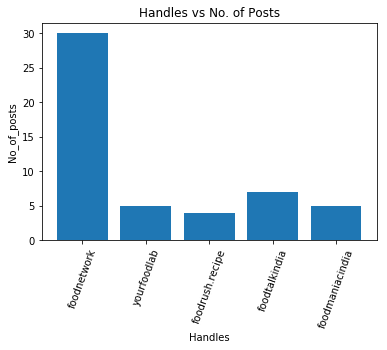

In [5]:
plt.bar(handles,number_posts)
plt.xticks(rotation=70)
plt.xlabel('Handles')
plt.ylabel('No_of_posts')
plt.title('Handles vs No. of Posts')
plt.show()

## 2.Your friend also needs a list of hashtags that he should use in his posts. 

### (2.1) Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle. 

In [7]:
top_5_handles={}
for handle in top_5_blog:
    top_10_post={}
    search = driver.find_element_by_xpath('//div[contains(@class,"LWmhU")]/input')           #input box
    search.send_keys(handle)
    b = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'z556c')))                  #clicking on first profile
    first_search = driver.find_element_by_class_name('z556c')
    first_search.click()
    a= wait.until(EC.presence_of_element_located((By.XPATH,'//input[contains(@class,"XTCLo")]')))    #to clear search box
    a.clear()
    for i in range(1):
        driver.execute_script('window.scrollBy(0,document.body.scrollHeight);')                      #down scrolling
        time.sleep(1)
    data=driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]')                           #fetching thee data 
    for j in range(1):
        driver.execute_script('window.scrollBy(0,-document.body.scrollHeight);')                     #up scrolling
        time.sleep(1)
    driver.execute_script('window.scrollBy(0,500);')                                                
    for i in range(10):
        post=driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]')                       #ftech the post
        driver.execute_script('window.scrollBy(0,80);')                                              # scroll by 80
        driver.implicitly_wait(10) 
        wait = WebDriverWait(driver, 10)
        post[i].click()                                                                             #clicking on each post
        data=driver.find_element_by_xpath('//div[contains(@class,"C4VMK")]/span')                   #text data
        value=data.text                                                                             #fecthing post
        top_10_post["post"+str(i+1)]=value    
        new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')                      #close button
        new.click()
    top_5_handles[handle]=top_10_post
for key in top_5_handles.keys():
    p=top_5_handles[key]
    print(key)
    i=0
    for key in p:
        print("**************************post",i+1,"****************************************")
        print(p[key])
        i=i+1
        print()

foodnetwork
**************************post 1 ****************************************
This holiday season, @discoveryinctv is working with @NoKidHungry to #TurnUpFightHunger and provide 10 MILLION meals for kids living with hunger in the U.S. Visit turnup.org to donate today and connect kids with the meals they need to succeed! #10MillionPossibilities

**************************post 2 ****************************************
Stuffed Standing Rib Roast 😵

Take your standing rib roast to the NEXT level this holiday season! (We could watch this getting UNROLLED and stuffed all day!) Save the recipe for your holiday dinner by downloading the @FoodNetworkKitchen app through the link in our bio!

**************************post 3 ****************************************
Comment with a heart if you're happiest in the kitchen, too! 💛 @rachaelray has a whole course with 15 classes about kitchen basics in the @FoodNetworkKitchen app. Download the app and start Rachael's classes today!

**********

### Prepare a list of all words used in all the scraped posts and calculate the frequency of each word. 

In [8]:
totalfreq={}
all_word=[]
for key in top_5_handles.keys():
    p=top_5_handles[key]
    i=0
    for key in p:
        data=p[key]
        s=data.split()
        for k in s:
            if k[0]=='#':                                               #only fetching hastages
                ans=k[1:]
                all_word.append(ans)
                if ans in totalfreq:
                    totalfreq[ans]+=1
                else:
                    totalfreq[ans]=1
print(totalfreq) 
print()
print(all_word)

{'TurnUpFightHunger': 1, '10MillionPossibilities': 1, 'UltimateHanukkahChallenge': 1, 'FoodNetworkKitchen.': 1, 'FoodNetworkKitchen': 1, 'TheKitchen,': 1, 'indian': 3, 'indiancuisine': 6, 'streetfood': 5, 'foodiesofinstagram': 6, 'kidsofinstagram': 3, 'foodie': 2, 'foodieofinstagram': 1, 'instagood': 5, 'instagram': 4, 'instafood': 10, 'LakeTahoe': 1, 'YourFoodLab': 1, 'sanjyotkeer': 4, 'kidscooking': 1, 'cute': 1, 'recipes': 2, 'indianfood': 8, 'instafamily': 1, 'yourfoodlab': 1, 'paratha': 1, 'healthyfood': 1, 'kidfoodie': 1, 'foodrush': 10, 'kadaipaneer': 1, 'paneer': 1, 'paneergravy': 1, 'jimjam': 1, 'jimjambiscuits': 1, 'biscuitfalooda': 1, 'falooda': 1, 'jimjamfalooda': 1, 'sabudana': 1, 'sago': 1, 'potato': 1, 'sabudanaballs': 1, 'sabudanapotatoballs': 1, 'pizza': 1, 'pizzacone': 1, 'pizzacones': 1, 'chocolate': 1, 'chocolatechunks': 1, 'brownie': 1, 'chocolatebrownie': 1, 'chocolatechunksbrownie': 1, 'aloo': 1, 'aloorecipe': 1, 'potatoes': 1, 'dumaloo': 1, 'dumaloorecipe': 1, '

In [9]:
import pandas as pd
import numpy as np
li_2d=[]
for i in totalfreq:
    s=[]
    s.append(i)
    s.append(totalfreq[i])
    li_2d.append(s)
final_data=np.array(li_2d)
dataset=pd.DataFrame({'Word':final_data[:,0],'Frequency':final_data[:,1]})
dataset.to_csv('Frequency.csv',index=False)
print(dataset)

                          Word Frequency
0            TurnUpFightHunger         1
1       10MillionPossibilities         1
2    UltimateHanukkahChallenge         1
3          FoodNetworkKitchen.         1
4           FoodNetworkKitchen         1
5                  TheKitchen,         1
6                       indian         3
7                indiancuisine         6
8                   streetfood         5
9           foodiesofinstagram         6
10             kidsofinstagram         3
11                      foodie         2
12           foodieofinstagram         1
13                   instagood         5
14                   instagram         4
15                   instafood        10
16                   LakeTahoe         1
17                 YourFoodLab         1
18                 sanjyotkeer         4
19                 kidscooking         1
20                        cute         1
21                     recipes         2
22                  indianfood         8
23              

### (2.4) Now, find the hashtags that were most popular among these bloggers 

In [10]:
t=1
top_5_hash=[]
top_5_times=[]
for i in sorted (totalfreq.items(), key = lambda kv: kv[1],reverse=True):
    top_5_hash.append(i[0])
    top_5_times.append(i[1])
    print(i)
    t+=1
    if t>5:
        break
    

('instafood', 10)
('foodrush', 10)
('foodmaniacindia', 10)
('indianfood', 8)
('indiagram', 8)


### (2.5) Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts. 

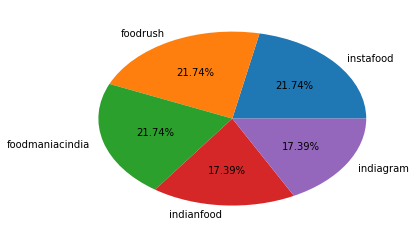

In [13]:
plt.pie(top_5_times,labels=top_5_hash,autopct="%.2f%%")
plt.show()

In [14]:
top_5_post_likes={'foodnetwork': {'post1': 14304, 'post2': 15436, 'post3': 4206, 'post4': 15090, 'post5': 12838, 'post6': 12445, 'post7': 21374}, 'yourfoodlab': {'post1': 86358}, 'foodrush.recipe': {'post1': 1465, 'post2': 241, 'post3': 1004, 'post4': 789, 'post5': 1309, 'post6': 4788, 'post7': 1524, 'post8': 1329, 'post9': 658, 'post10': 531}, 'foodtalkindia': {'post1': 3912, 'post2': 4285, 'post3': 3202, 'post4': 3785, 'post5': 1696, 'post6': 2935, 'post7': 5181, 'post8': 3862, 'post9': 2769, 'post10': 2843}, 'foodmaniacindia': {'post1': 1414, 'post2': 2819, 'post3': 2831, 'post4': 3692, 'post5': 5315, 'post6': 4323, 'post7': 4537, 'post8': 2805, 'post9': 2417, 'post10': 5651}}

# 3.You need to also calculate average followers : likes ratio for the obtained handles.
## Followers : Likes ratio is calculated as follows:
### (3.1) Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [15]:
from selenium.common.exceptions import NoSuchElementException               #to check for exception
top_5_post_like={}                                                          #dictionary for top five post
for t in top_5_blog:                                                        
    post_likes={}
    count=0
    data=driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')  #input box
    data.send_keys(t)                                                       #send handle
    driver.implicitly_wait(10)
    data=driver.find_element_by_xpath('//span[contains(@class,"Ap253")]')   #first search
    data.click()
    driver.implicitly_wait(10)
    for i in range(12):
        driver.execute_script('window.scrollBy(0,2000);')                  #scroll by 2000
        time.sleep(1)
    data=driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]') #fetch the elements
    for j in range(12): 
        driver.execute_script('window.scrollBy(0,-2000);')                 #scroll by 2000
        time.sleep(1)
    driver.execute_script('window.scrollBy(0,500);')                       #make in proper place f post
    final=data
    driver.implicitly_wait(10)
    for p in range(len(final)):
        if count>9:
            break  
        try:
            data=driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]')  #fetch post
            driver.execute_script('window.scrollBy(0,80);')
            final=len(data)
            driver.implicitly_wait(10)
            data[p].click()
            driver.implicitly_wait(10)
            data=driver.find_element_by_xpath('//button[contains(@class,"sqdOP ")]//span')  #find likes on post
            val=data.text
            if val=='':
                new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')     #close post
                new.click()
                continue
            if val[0]=='V':
                new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')
                new.click()
                continue
            val=val.replace(',','')
            ans=val
            count=count+1
            number='post'+str(count)
            post_likes[number]=ans
            new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')
            new.click()
            
        except NoSuchElementException:
            new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')
            new.click()
    
    top_5_post_like[t]=post_likes
print(top_5_post_likes)

{'foodnetwork': {'post1': 14304, 'post2': 15436, 'post3': 4206, 'post4': 15090, 'post5': 12838, 'post6': 12445, 'post7': 21374}, 'yourfoodlab': {'post1': 86358}, 'foodrush.recipe': {'post1': 1465, 'post2': 241, 'post3': 1004, 'post4': 789, 'post5': 1309, 'post6': 4788, 'post7': 1524, 'post8': 1329, 'post9': 658, 'post10': 531}, 'foodtalkindia': {'post1': 3912, 'post2': 4285, 'post3': 3202, 'post4': 3785, 'post5': 1696, 'post6': 2935, 'post7': 5181, 'post8': 3862, 'post9': 2769, 'post10': 2843}, 'foodmaniacindia': {'post1': 1414, 'post2': 2819, 'post3': 2831, 'post4': 3692, 'post5': 5315, 'post6': 4323, 'post7': 4537, 'post8': 2805, 'post9': 2417, 'post10': 5651}}


### (3.2) Calculate the average likes for a handle 

In [16]:
average_5_handle={}
for i in top_5_post_likes:
    c=0
    tsum=0
    d=top_5_post_likes[i]
    for j in d:
        c=c+1
        tsum+=d[j]
        average=tsum/c
    average_5_handle[i]=average
for key in average_5_handle.keys():
    print(key,end="    ")
    print("{0:.2f}".format(average_5_handle[key]))
    

foodnetwork    13670.43
yourfoodlab    86358.00
foodrush.recipe    1363.80
foodtalkindia    3447.00
foodmaniacindia    3580.40


### (3.3) Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [17]:
i=0
avg_follower  = []
for key in average_5_handle.keys():
    avg = average_5_handle[key]/max_follow[i]
    avg_follower.append(avg)
    print(key,"     ",avg)
    i=i+1
    

foodnetwork       0.0014019137801269796
yourfoodlab       0.1082977077123147
foodrush.recipe       0.002075994994961473
foodtalkindia       0.012017068630116928
foodmaniacindia       0.01309276540970658


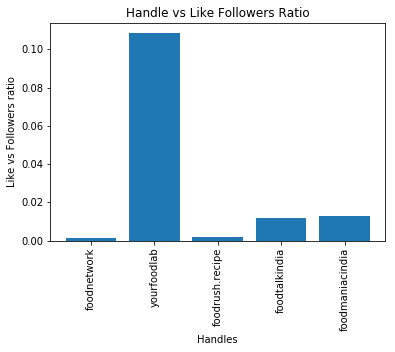

In [22]:
plt.bar(top_5_blog,avg_follower)
plt.xticks(rotation=90)
plt.xlabel('Handles')
plt.ylabel('Like vs Followers ratio')
plt.title('Handle vs Like Followers Ratio')
plt.show()